In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from plot_drift import plot_drift
from plot_trajectory import plot_trajectory

In [3]:
#!./run.sh
output_dir = "output/dust_drift/"

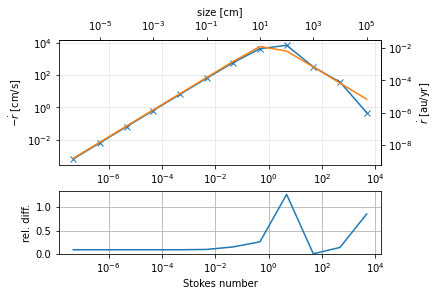

In [44]:
plot_drift(output_dir);

stokes 4.683726991350915e-08 	 size =  1e-06 cm 	 sim / theo = 0.9092830726649058
stokes 4.683724829218446e-07 	 size =  9.999999999999999e-06 cm 	 sim / theo = 0.9092807978444287
stokes 4.683703208293845e-06 	 size =  9.999999999999999e-05 cm 	 sim / theo = 0.9092809418851825
stokes 4.683487040406019e-05 	 size =  0.001 cm 	 sim / theo = 0.909281742188672
stokes 0.00046813294613477253 	 size =  0.01 cm 	 sim / theo = 0.9093247591804441
stokes 0.004659717169307076 	 size =  0.09999999999999999 cm 	 sim / theo = 0.9091990654795082
stokes 0.04446995681458038 	 size =  1.0 cm 	 sim / theo = 0.909204847936128
stokes 0.2818431420570597 	 size =  10.0 cm 	 sim / theo = 0.9072567796465079
stokes 3.398712182065329 	 size =  100.0 cm 	 sim / theo = 0.9089438689328121
stokes 45.70965132310373 	 size =  999.9999999999999 cm 	 sim / theo = 0.9067509045970918
stokes 467.17918630709755 	 size =  10000.0 cm 	 sim / theo = 1.3955362752944112
stokes 4682.268213498035 	 size =  100000.0 cm 	 sim / theo 

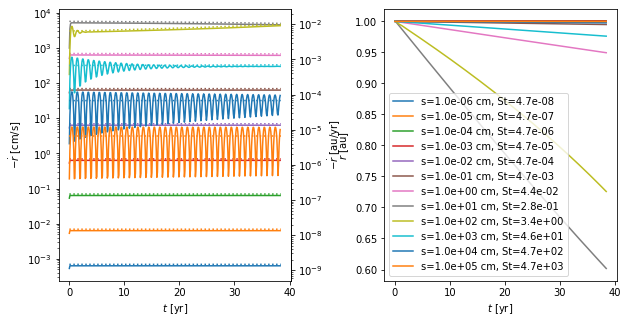

In [43]:
plot_trajectory(output_dir);

In [6]:
def calc_stokes(size, particle_density, surface_density):
    return np.pi*size*particle_density / (2*surface_density)

In [7]:
import astropy.units as u
calc_stokes(1e-4*u.cm, 2.65*u.g/u.cm**3, 10*u.g/u.cm**2)

<Quantity 4.16261027e-05>

In [8]:
calc_stokes(100*u.cm, 2.65*u.g/u.cm**3, 10*u.g/u.cm**2)

<Quantity 41.62610266>

Stokes number calculation is correct in the FARGO code in case of Epstein drag only

In [9]:
4.16/1.51

2.7549668874172184

In [10]:
1/np.sqrt(1.4)

0.8451542547285166

In [11]:
1/1.4

0.7142857142857143

In [12]:
import astropy.units as u
import astropy.constants as const

Gas density in cgs

In [13]:
rhog = (10*u.g/u.cm**2 / (np.sqrt(2*np.pi) * 0.05* 1 * u.au)).to("g/cm3")
rhog

<Quantity 5.33352886e-12 g / cm3>

mean free path according to HB03 https://iopscience.iop.org/article/10.1086/345472/pdf eq 20
l (cm) = 4.72e-9 / (rho_g / (g/cm3)) cm

In [14]:
l = 4.72e-9 *u.cm / rhog.to_value("g/cm3")
l

<Quantity 884.96755595 cm>

For a s = 1e-4 cm particle

In [15]:
f = (1e-4*u.cm) / (1e-4*u.cm + l)
f

<Quantity 1.1299848e-07>

In [16]:
m0 = 2.35*u.u
temperature = 626.9*u.K
vthermal = np.sqrt(8 * const.k_B * temperature / (np.pi*m0))

In [17]:
vthermal.decompose()

<Quantity 2376.57953771 m / s>

In [18]:
np.sqrt(8/np.pi)*0.05

0.07978845608028655

in the code at r=1, vthermal = 0.07979 calcualting from temperature

In [19]:
np.sqrt(8/np.pi)*0.05

0.07978845608028655

In Picogna et al 2015, Fig. C2 shows the theoretical drift rate for a particle of stokes number  7.4e-4, which is roughly 5e-6 in the units shown.
The axis is labeled as cm/s, however, the order of magnitude fits for au/yr

In [20]:
sigmaslope = -1
temperatureslope = -1
Mstar = 0.05*u.solMass
h = 0.05
r = 1*u.au
stokes = 7.4e-4
vK = np.sqrt(const.G*Mstar/r).decompose()
eta = h**2 * (sigmaslope + temperatureslope)
vdrift = eta*vK/(stokes + stokes**-1)
vdrift.to("au/yr")

<Quantity -5.19826188e-06 AU / yr>

In [21]:
vK

<Quantity 6660.059562 m / s>

In [22]:
np.sqrt(8/np.pi)*0.05*vK

<Quantity 531.39586986 m / s>

In [23]:
885/1e-4/2

4425000.0

In [24]:
10*(1*u.au).to_value("cm")

149597870700000.0

In [25]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from drift_theo import vdrift_theo
vdrift_theo(7.4e-4, 1*u.au, Mstar=0.55*u.solMass, h=0.05).to("au/yr")

<Quantity -1.72406842e-05 AU / yr>

In [26]:
from load_dust import construct_dust_trajectories
import matplotlib.pyplot as plt
import numpy as np

p = construct_dust_trajectories("output/dust_drift/")[0]

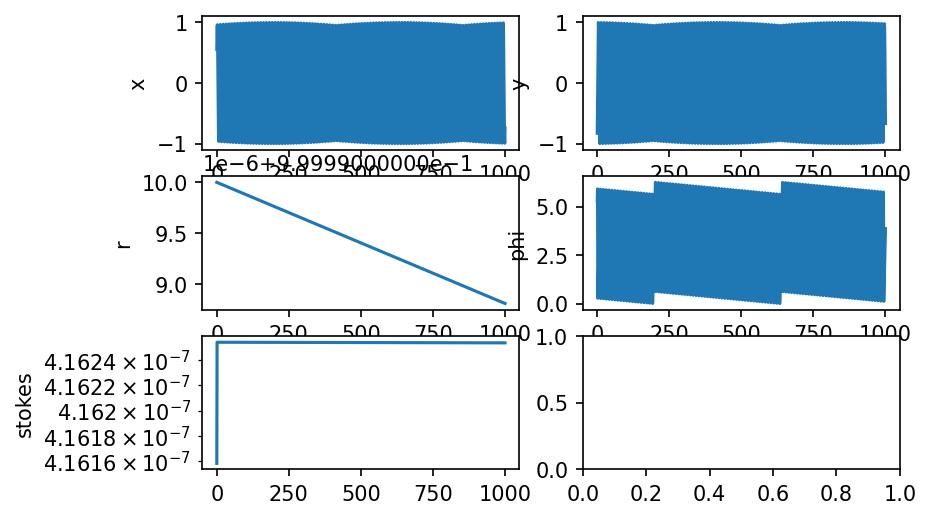

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=3, dpi=150)

for ax, name in zip(axes.ravel(), ["x", "y", "r", "phi", "stokes"]):
    ax.plot(p[name])
    ax.set_ylabel(name)
    
axes[2,0].set_yscale("log")